### Kütüphaneler

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules 

### Daha önce temizlenmiş veri setini yükleme

In [2]:
data = pd.read_csv("data/clean_data.csv")

### Gerekli olan sütunları seçme

In [3]:
data_reason = data[["Accident_Index",
                    "Local_Authority_(Highway)",
                    "Accident_Severity",
                    "Day_of_Week",
                    "Time",
                    "Road_Type",
                    "Junction_Control",
                    "Pedestrian_Crossing-Human_Control",
                    "Pedestrian_Crossing-Physical_Facilities",
                    "Light_Conditions",
                    "Weather_Conditions",
                    "Road_Surface_Conditions",
                    "Special_Conditions_at_Site",
                    "Carriageway_Hazards",
                    "Urban_or_Rural_Area"]]

### Sayısal verileri mapping ile Sözel hale getirme

In [4]:
mappings = {
    1:"Urban",
    2:"Rural"
}
df = data_reason.copy()

df["Urban_or_Rural_Area"] = data_reason["Urban_or_Rural_Area"].map(mappings)


In [5]:
mappings = {
    1:"Monday",
    2:"Tuesday", 
    3:"Wednesday",
    4:"Thursday",
    5:"Friday", 
    6:"Saturday",
    7:"Sunday"
}

df["Day_of_Week"] = data_reason["Day_of_Week"].map(mappings)

In [6]:
mappings = {
    1:"Killed",
    2:"Serious", 
    3:"Slight"
}

df["Accident_Severity"] = data_reason["Accident_Severity"].map(mappings)

In [7]:
df.head(5)

,Accident_Index,Local_Authority_(Highway),Accident_Severity,Day_of_Week,Time,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,200501BS00001,E09000020,Serious,Wednesday,17:42,Single carriageway,Not Specified,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
1,200501BS00002,E09000020,Slight,Thursday,17:36,Dual carriageway,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
2,200501BS00003,E09000020,Slight,Friday,00:15,Single carriageway,Not Specified,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
3,200501BS00004,E09000020,Slight,Saturday,10:35,Single carriageway,Not Specified,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
4,200501BS00005,E09000020,Slight,Tuesday,21:13,Single carriageway,Not Specified,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban


### Örnek için bir district seçme

In [8]:
KnC = df[df["Local_Authority_(Highway)"] == "E09000020"]

In [9]:
KnC

,Accident_Index,Local_Authority_(Highway),Accident_Severity,Day_of_Week,Time,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,200501BS00001,E09000020,Serious,Wednesday,17:42,Single carriageway,Not Specified,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
1,200501BS00002,E09000020,Slight,Thursday,17:36,Dual carriageway,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
2,200501BS00003,E09000020,Slight,Friday,00:15,Single carriageway,Not Specified,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
3,200501BS00004,E09000020,Slight,Saturday,10:35,Single carriageway,Not Specified,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
4,200501BS00005,E09000020,Slight,Tuesday,21:13,Single carriageway,Not Specified,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338616,201401QK50511,E09000020,Slight,Wednesday,09:12,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
1341108,201401TD00001,E09000020,Killed,Tuesday,15:29,Single carriageway,Giveway or uncontrolled,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
1341214,201401TD00125,E09000020,Killed,Wednesday,14:23,One way street,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Urban
1343822,201401WW50302,E09000020,Slight,Sunday,23:00,Single carriageway,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,Rural


### Encoding yapılacak sütunları seçme

In [10]:
KnC_accident_severity = KnC[[  "Accident_Severity",
                                "Day_of_Week",
                                "Road_Type",
                                "Junction_Control",
                                "Light_Conditions",
                                "Weather_Conditions",
                                "Road_Surface_Conditions"]]

In [11]:
KnC_accident_severity.describe()

,Accident_Severity,Day_of_Week,Road_Type,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
count,6313,6313,6313,6313,6313,6313,6313
unique,3,7,6,5,5,8,5
top,Slight,Saturday,Single carriageway,Giveway or uncontrolled,Daylight: Street light present,Fine without high winds,Dry
freq,5511,1064,5363,3461,4410,5442,5183


In [12]:
KnC_accident_severity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6313 entries, 0 to 1344381
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Accident_Severity        6313 non-null   object
 1   Day_of_Week              6313 non-null   object
 2   Road_Type                6313 non-null   object
 3   Junction_Control         6313 non-null   object
 4   Light_Conditions         6313 non-null   object
 5   Weather_Conditions       6313 non-null   object
 6   Road_Surface_Conditions  6313 non-null   object
dtypes: object(7)
memory usage: 394.6+ KB


#### Accident Severity değerine göre işlem yapacağım için Sözel veriyi sayısal veriye çeviriyoruz

In [13]:
mappings = {
    "Killed":1,
    "Serious":2, 
    "Slight":3
}

KnC_accident_severity["Accident_Severity"] = KnC_accident_severity["Accident_Severity"].map(mappings)

C:\Users\kdrer\AppData\Local\Temp\ipykernel_14032\1369366713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KnC_accident_severity["Accident_Severity"] = KnC_accident_severity["Accident_Severity"].map(mappings)


In [14]:
# One Hot Encoding the categorical columns
accident_severity_df = pd.get_dummies(data=KnC_accident_severity, columns=[ "Day_of_Week",
                                                                            "Road_Type",
                                                                            "Junction_Control",
                                                                            "Light_Conditions",
                                                                            "Weather_Conditions",
                                                                            "Road_Surface_Conditions"])

In [15]:
accident_severity_df.sample(2)

,Accident_Severity,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Road_Type_Dual carriageway,Road_Type_One way street,...,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
200514,3,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
199283,3,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


#### Korelasyon

In [16]:
# Correlation between 'Accident_Severity' and rest of variables
accident_severity = accident_severity_df.corr().loc['Accident_Severity':] 
accident_severity = pd.DataFrame(accident_severity)

In [17]:
accident_severity

,Accident_Severity,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Road_Type_Dual carriageway,Road_Type_One way street,...,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
Accident_Severity,1.000000,0.002928,0.007250,-0.004476,0.024867,-0.011562,0.002443,-0.017134,-0.026542,0.009832,...,-0.001211,-0.000602,0.014732,0.003138,-0.020144,-0.011615,0.004697,0.010798,0.008126,0.009106
Day_of_Week_Friday,0.002928,1.000000,-0.141143,-0.195907,-0.159286,-0.192687,-0.178690,-0.183250,-0.002226,0.013046,...,-0.011113,-0.003690,-0.002779,0.005820,-0.016003,0.007783,-0.005477,-0.022610,-0.002105,-0.004336
Day_of_Week_Monday,0.007250,-0.141143,1.000000,-0.146041,-0.118741,-0.143641,-0.133206,-0.136606,-0.007600,0.008982,...,0.002865,0.026611,0.019295,0.004423,-0.007969,-0.016083,-0.004083,-0.006441,-0.003819,0.017756
Day_of_Week_Saturday,-0.004476,-0.195907,-0.146041,1.000000,-0.164813,-0.199374,-0.184890,-0.189609,0.025590,-0.000784,...,-0.003002,-0.005083,-0.005844,-0.002524,-0.017012,0.008225,-0.005667,0.001101,-0.012230,-0.006763
Day_of_Week_Sunday,0.024867,-0.159286,-0.118741,-0.164813,1.000000,-0.162104,-0.150328,-0.154165,-0.001637,0.015403,...,-0.010040,-0.013321,-0.014971,-0.015879,-0.002197,0.016040,-0.004608,-0.009553,-0.006826,-0.013916
Day_of_Week_Thursday,-0.011562,-0.192687,-0.143641,-0.199374,-0.162104,1.000000,-0.181852,-0.186493,0.003244,-0.020183,...,-0.005209,0.010115,0.028894,0.011607,-0.000898,-0.022031,-0.005574,0.001758,0.015506,0.020302
Day_of_Week_Tuesday,0.002443,-0.178690,-0.133206,-0.184890,-0.150328,-0.181852,1.000000,-0.172945,-0.014078,-0.010924,...,0.012693,0.006313,-0.010192,0.008785,0.018583,-0.010507,0.030650,0.048249,0.009389,0.001847
Day_of_Week_Wednesday,-0.017134,-0.183250,-0.136606,-0.189609,-0.154165,-0.186493,-0.172945,1.000000,-0.006318,-0.002172,...,0.014140,-0.017390,-0.013255,-0.013253,0.025367,0.015277,-0.005301,-0.013338,-0.001026,-0.013324
Road_Type_Dual carriageway,-0.026542,-0.002226,-0.007600,0.025590,-0.001637,0.003244,-0.014078,-0.006318,1.000000,-0.067084,...,-0.001490,0.021181,-0.027512,0.007548,0.004433,0.016166,-0.003787,0.039763,-0.014184,-0.019900
Road_Type_One way street,0.009832,0.013046,0.008982,-0.000784,0.015403,-0.020183,-0.010924,-0.002172,-0.067084,1.000000,...,0.005293,-0.000531,0.005253,-0.002695,0.001363,0.010738,-0.002807,0.017194,-0.010512,-0.011812


#### Korelasyon matrisi

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Matristeki renk sarıya yaklaştıkça o sütunun kazanın ölümcüllük derecesine etkisinin daha fazla olduğunu anlıyoruz

<Axes: >

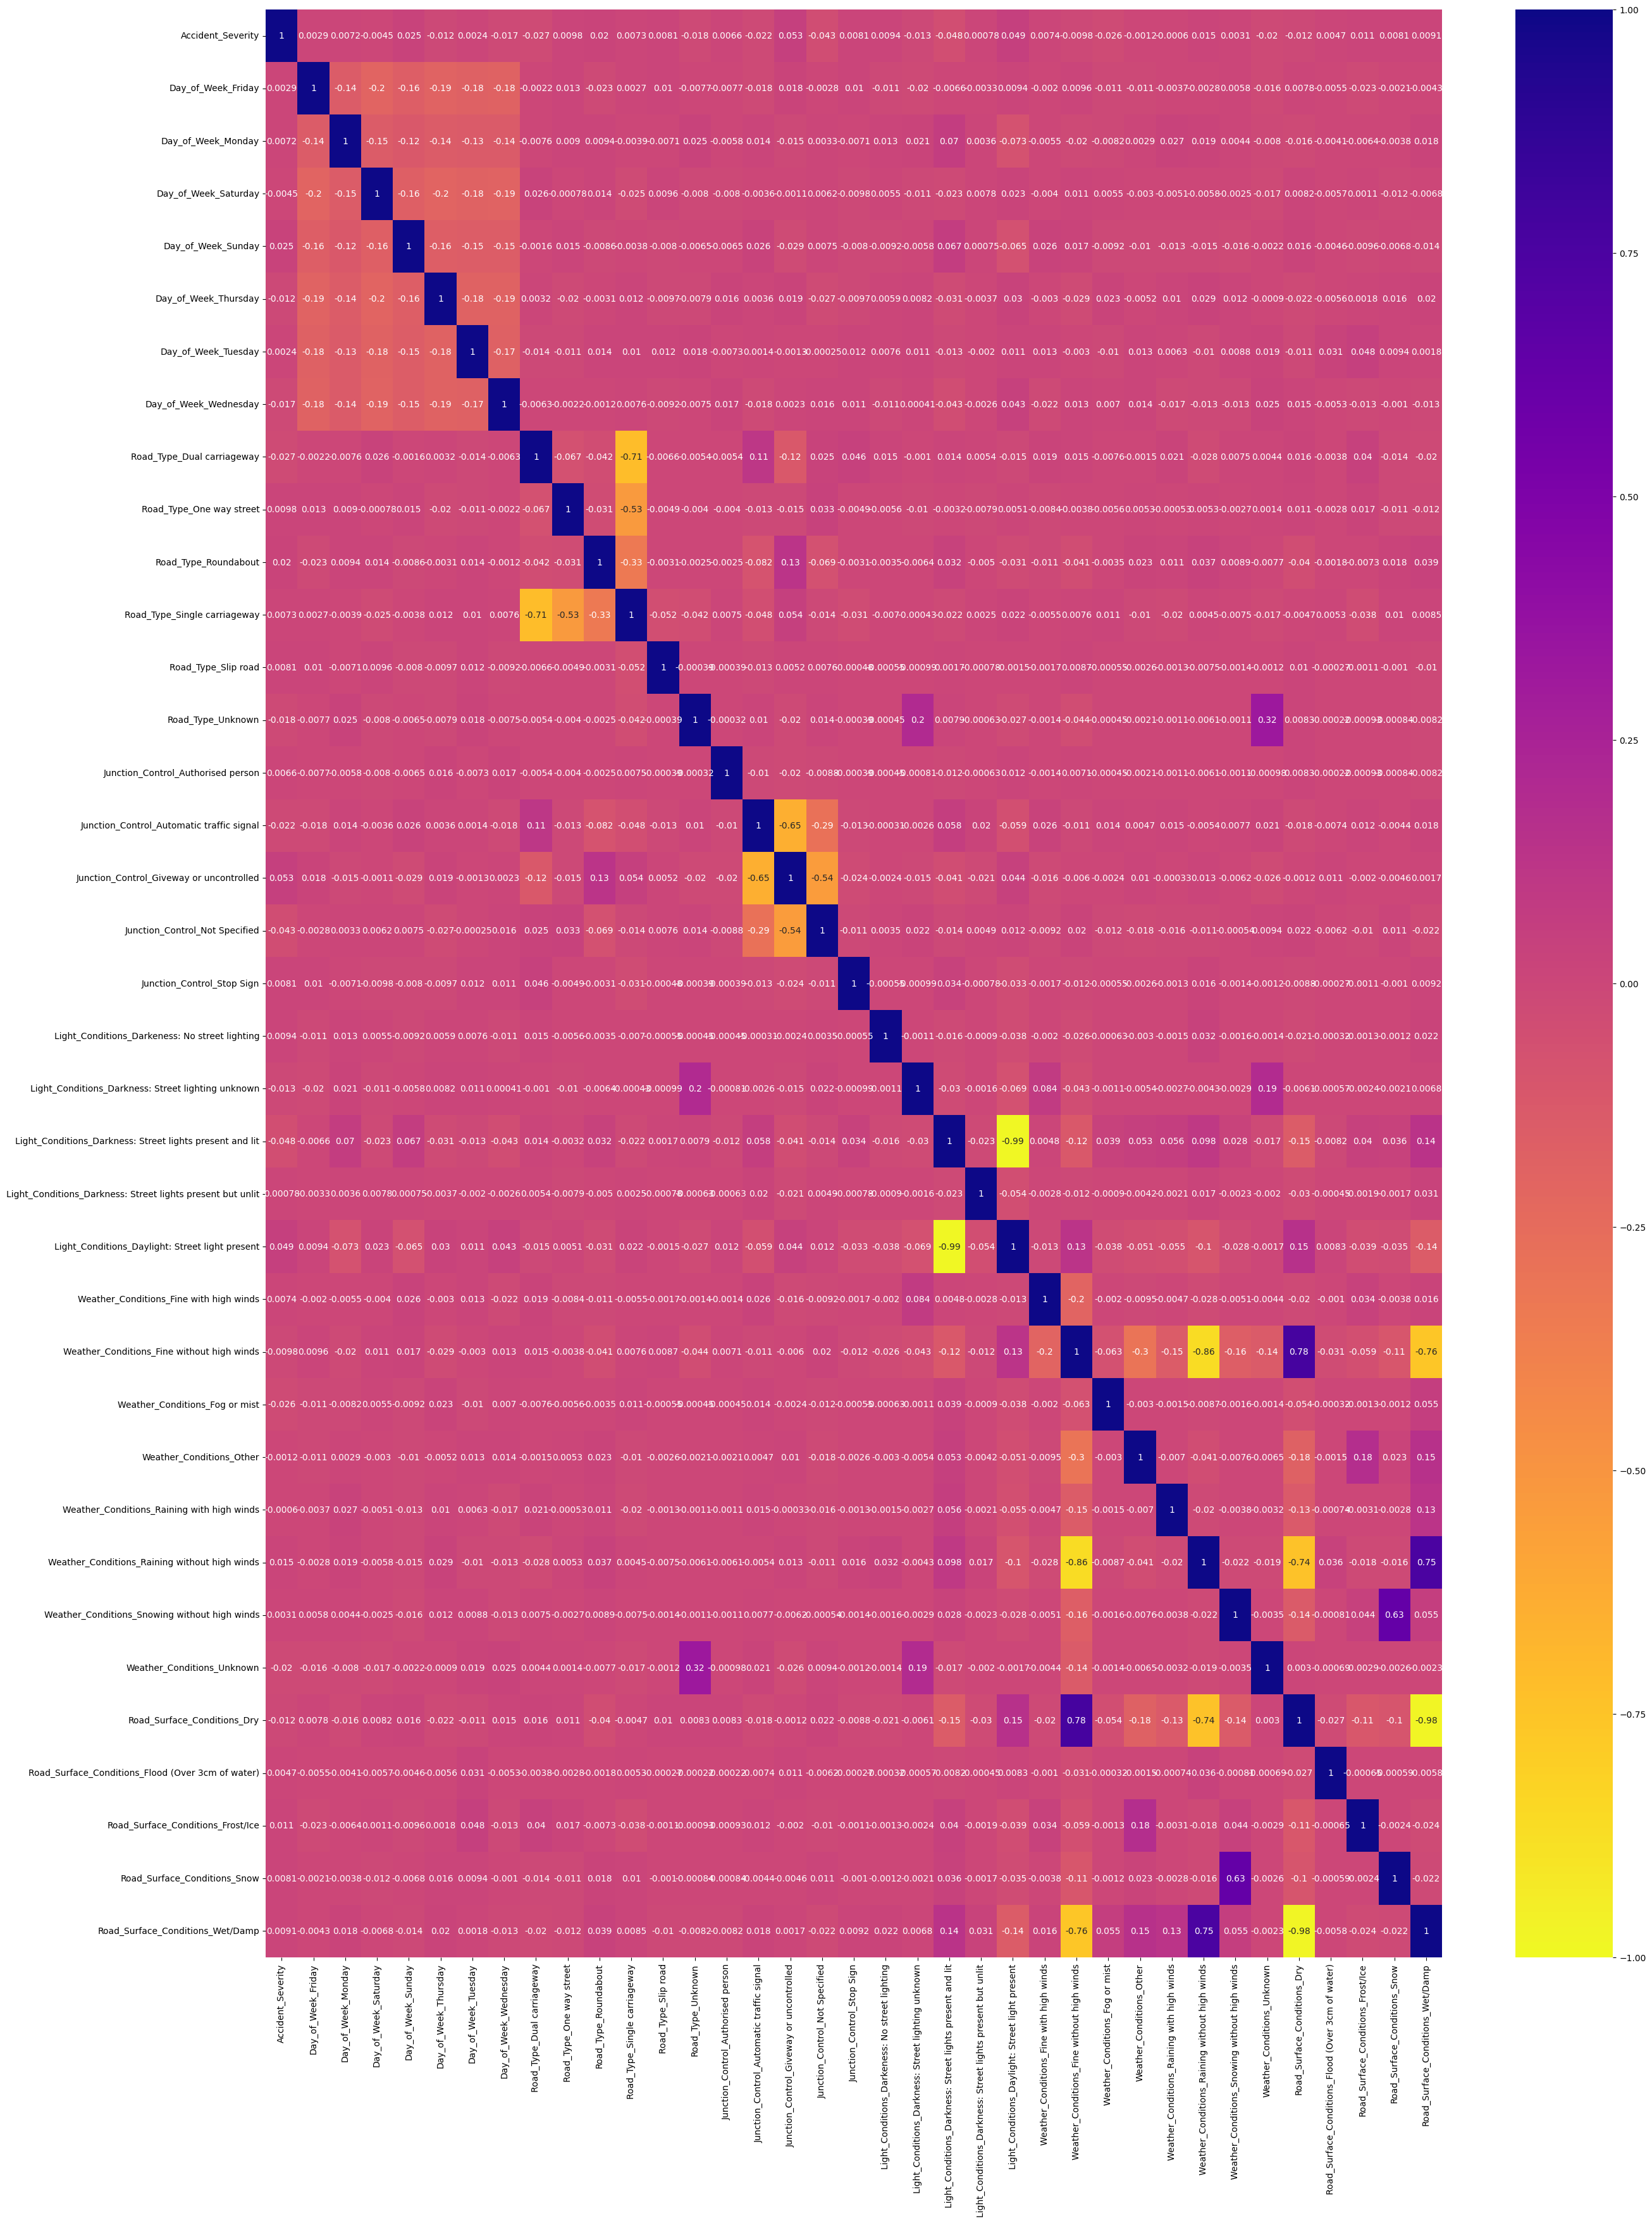

In [19]:
plt.figure(figsize=(30,40))
sns.heatmap(accident_severity, vmin=-1, cmap='plasma_r', annot = True)

In [20]:
import numpy as np

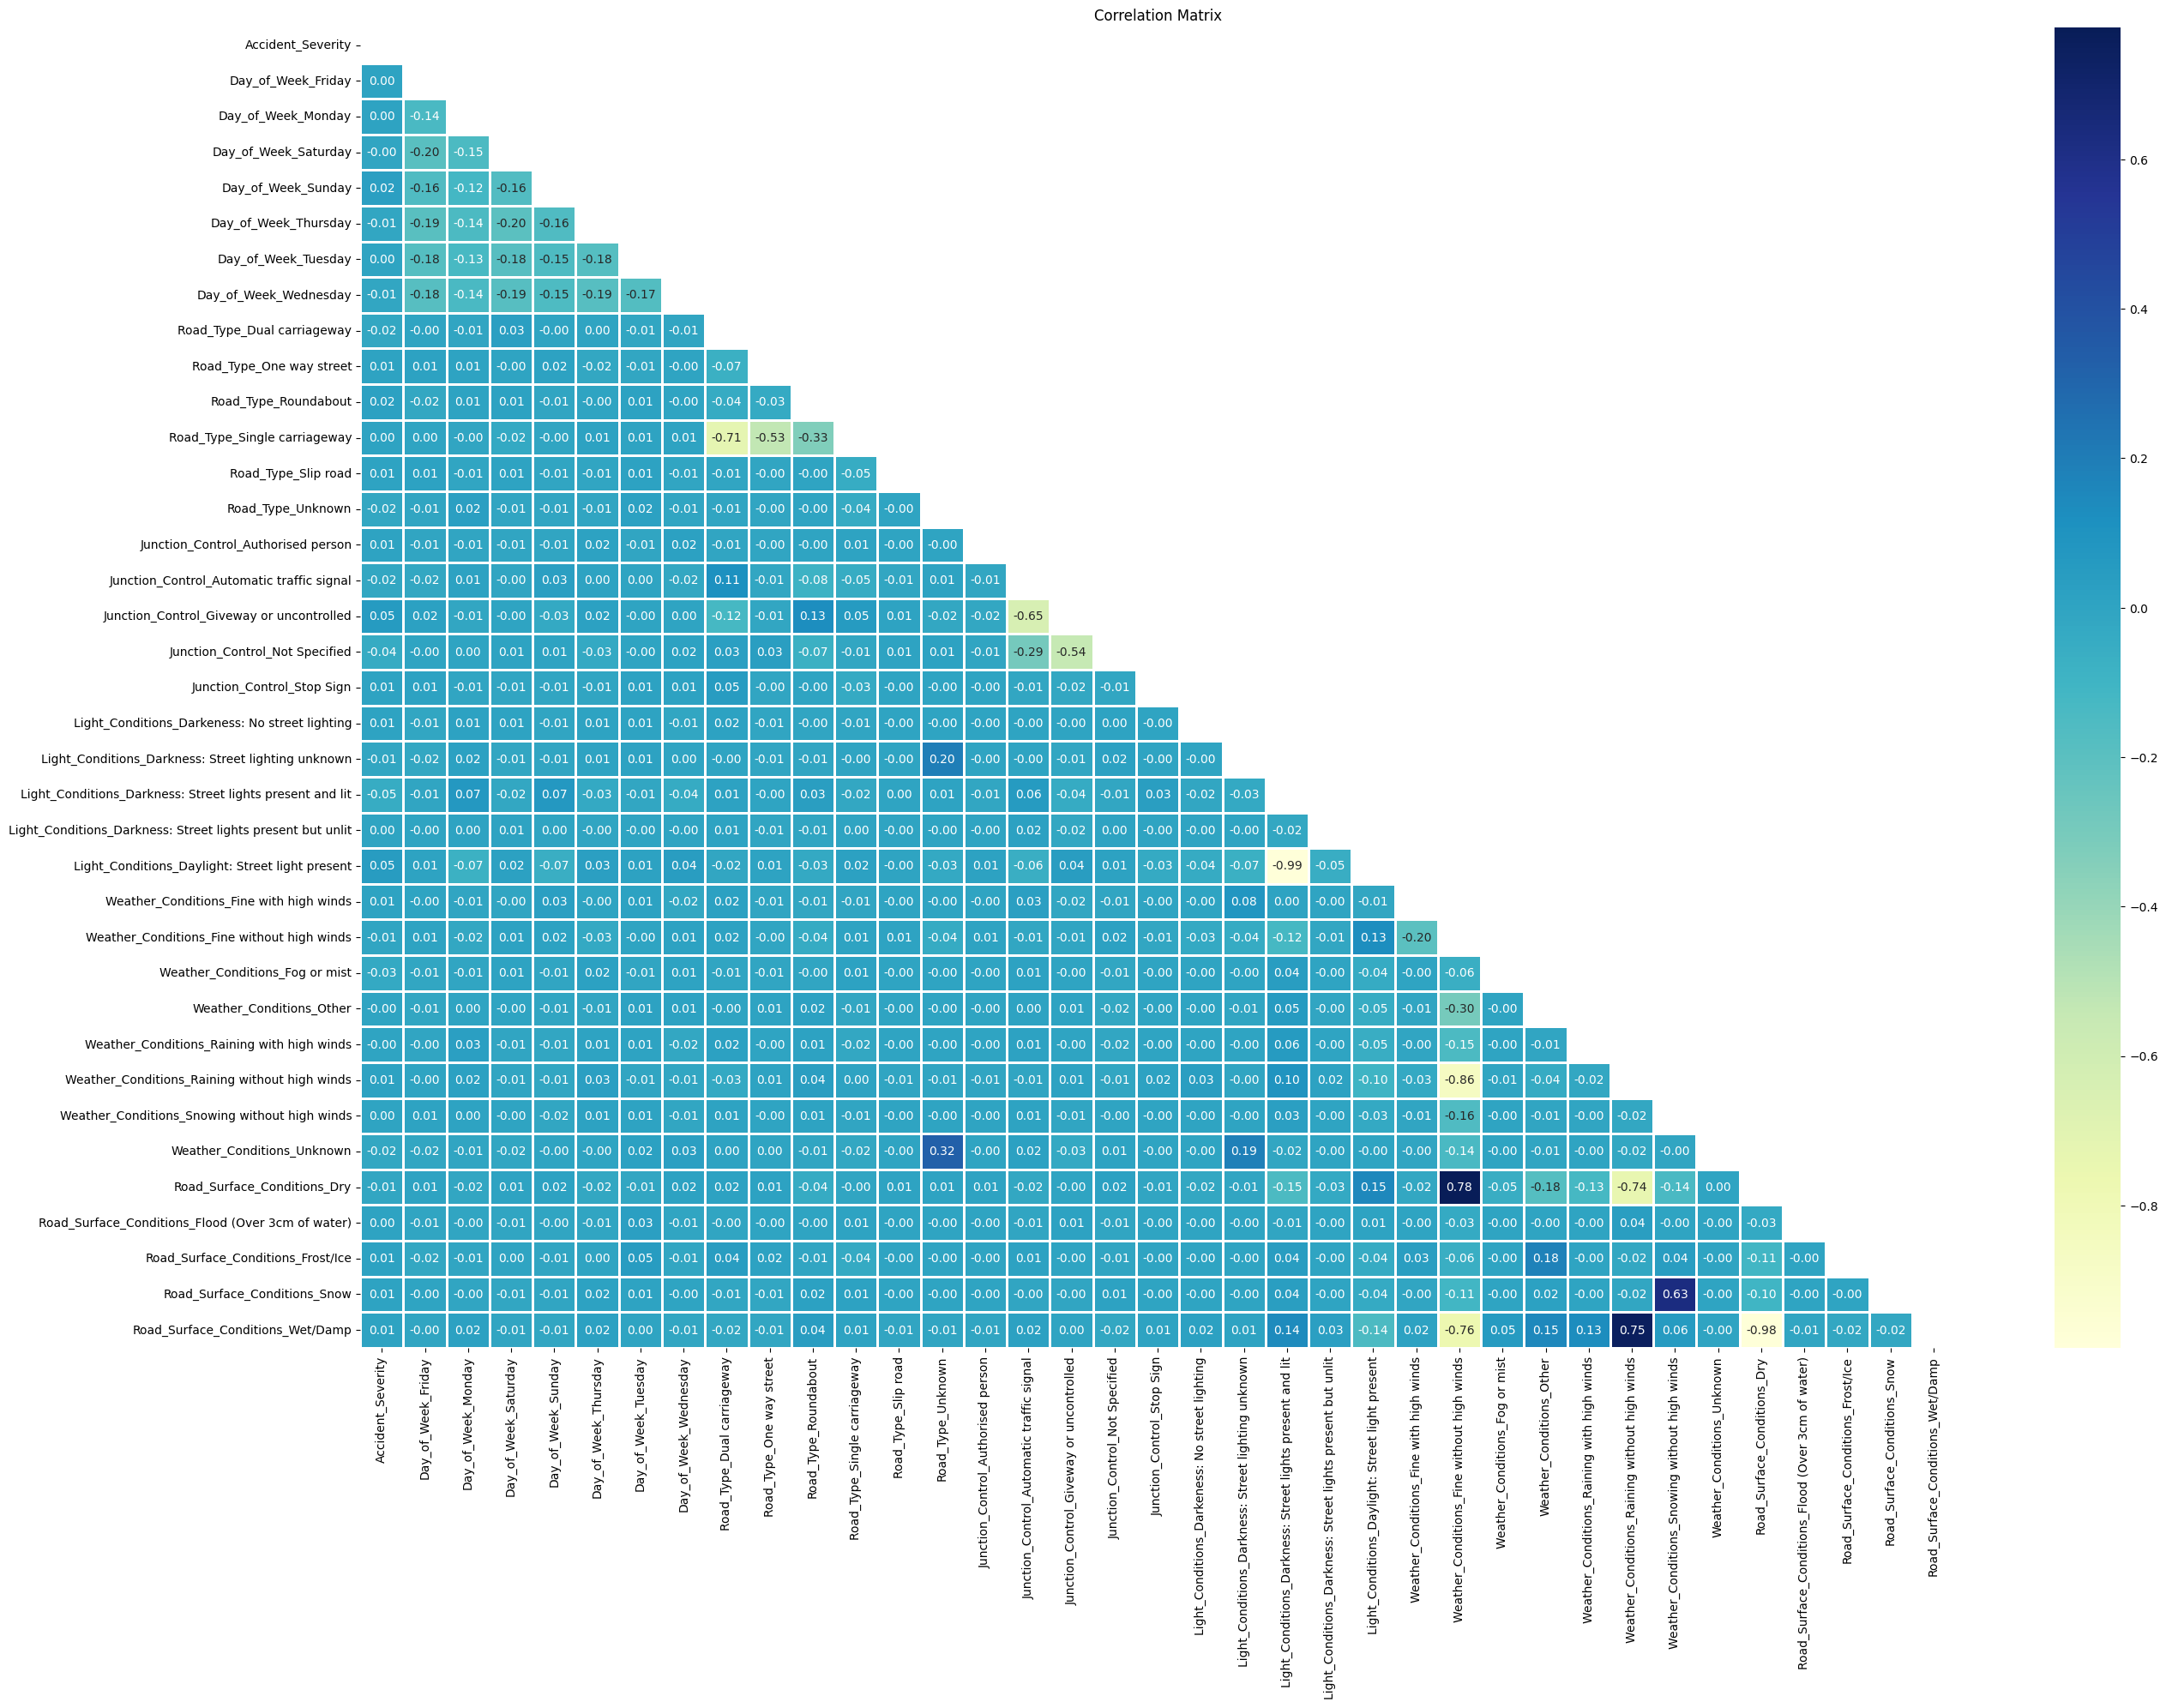

In [21]:
plt.figure(figsize = (30,20))
corr = accident_severity_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

#### Light and Weather Conditions

In [22]:
accident_severity_wl = {'Light_Conditions' : data_reason.Light_Conditions, 
                          'Weather_Conditions' : data_reason.Weather_Conditions,
                          'Accident_Severity' : data_reason.Accident_Severity}
accident_severity_wl = pd.DataFrame(accident_severity_wl)
accident_severity_wl.sample(4)

,Light_Conditions,Weather_Conditions,Accident_Severity
1053170,Daylight: Street light present,Fine without high winds,3
792851,Darkness: Street lights present and lit,Snowing without high winds,3
871566,Daylight: Street light present,Fine without high winds,3
59280,Daylight: Street light present,Fine without high winds,3


In [23]:
# One Hot Encoding the categorical columns
accident_severity_wl = pd.get_dummies(data=accident_severity_wl, columns=['Light_Conditions', 'Weather_Conditions'])

In [24]:
accident_severity_wl.sample(2)

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
309592,3,False,False,False,False,True,False,True,False,False,False,False,False,False,False
733473,3,False,False,False,False,True,False,False,False,False,False,True,False,False,False


In [25]:
# Correlation between 'Accident_Severity' and rest of variables
accident_severity_wl_corr = accident_severity_wl.corr().loc['Accident_Severity':] 
accident_severity_wl_corr = pd.DataFrame(accident_severity_wl_corr)

In [26]:
accident_severity_wl_corr

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071868,0.002537,-0.017893,-0.003907,0.053270,-0.006137,-0.025911,-0.004129,0.013067,0.000509,0.018484,0.002970,0.010848,0.017188
Light_Conditions_Darkeness: No street lighting,-0.071868,1.000000,-0.025110,-0.119867,-0.016476,-0.401584,0.018705,-0.075426,0.058205,0.037797,0.048528,0.033952,0.028189,0.030611,-0.015431
Light_Conditions_Darkness: Street lighting unknown,0.002537,-0.025110,1.000000,-0.051200,-0.007038,-0.171534,-0.002170,-0.045460,0.005898,0.002415,0.000510,-0.006346,0.000824,0.003123,0.141825
Light_Conditions_Darkness: Street lights present and lit,-0.017893,-0.119867,-0.051200,1.000000,-0.033595,-0.818853,0.007075,-0.093421,0.011636,0.032145,0.041585,0.081378,0.001349,0.016884,-0.012189
Light_Conditions_Darkness: Street lights present but unlit,-0.003907,-0.016476,-0.007038,-0.033595,1.000000,-0.112552,0.003085,-0.017764,0.005995,0.008074,0.010193,0.012120,0.002810,0.002064,-0.001882
Light_Conditions_Daylight: Street light present,0.053270,-0.401584,-0.171534,-0.818853,-0.112552,1.000000,-0.016002,0.136161,-0.042854,-0.050217,-0.064130,-0.091022,-0.016420,-0.032041,-0.013625
Weather_Conditions_Fine with high winds,-0.006137,0.018705,-0.002170,0.007075,0.003085,-0.016002,1.000000,-0.223695,-0.008288,-0.016899,-0.013234,-0.040775,-0.004051,-0.009759,-0.015484
Weather_Conditions_Fine without high winds,-0.025911,-0.075426,-0.045460,-0.093421,-0.017764,0.136161,-0.223695,1.000000,-0.148699,-0.303196,-0.237437,-0.731578,-0.072686,-0.175088,-0.277821
Weather_Conditions_Fog or mist,-0.004129,0.058205,0.005898,0.011636,0.005995,-0.042854,-0.008288,-0.148699,1.000000,-0.011233,-0.008797,-0.027105,-0.002693,-0.006487,-0.010293
Weather_Conditions_Other,0.013067,0.037797,0.002415,0.032145,0.008074,-0.050217,-0.016899,-0.303196,-0.011233,1.000000,-0.017937,-0.055266,-0.005491,-0.013227,-0.020988


<Axes: >

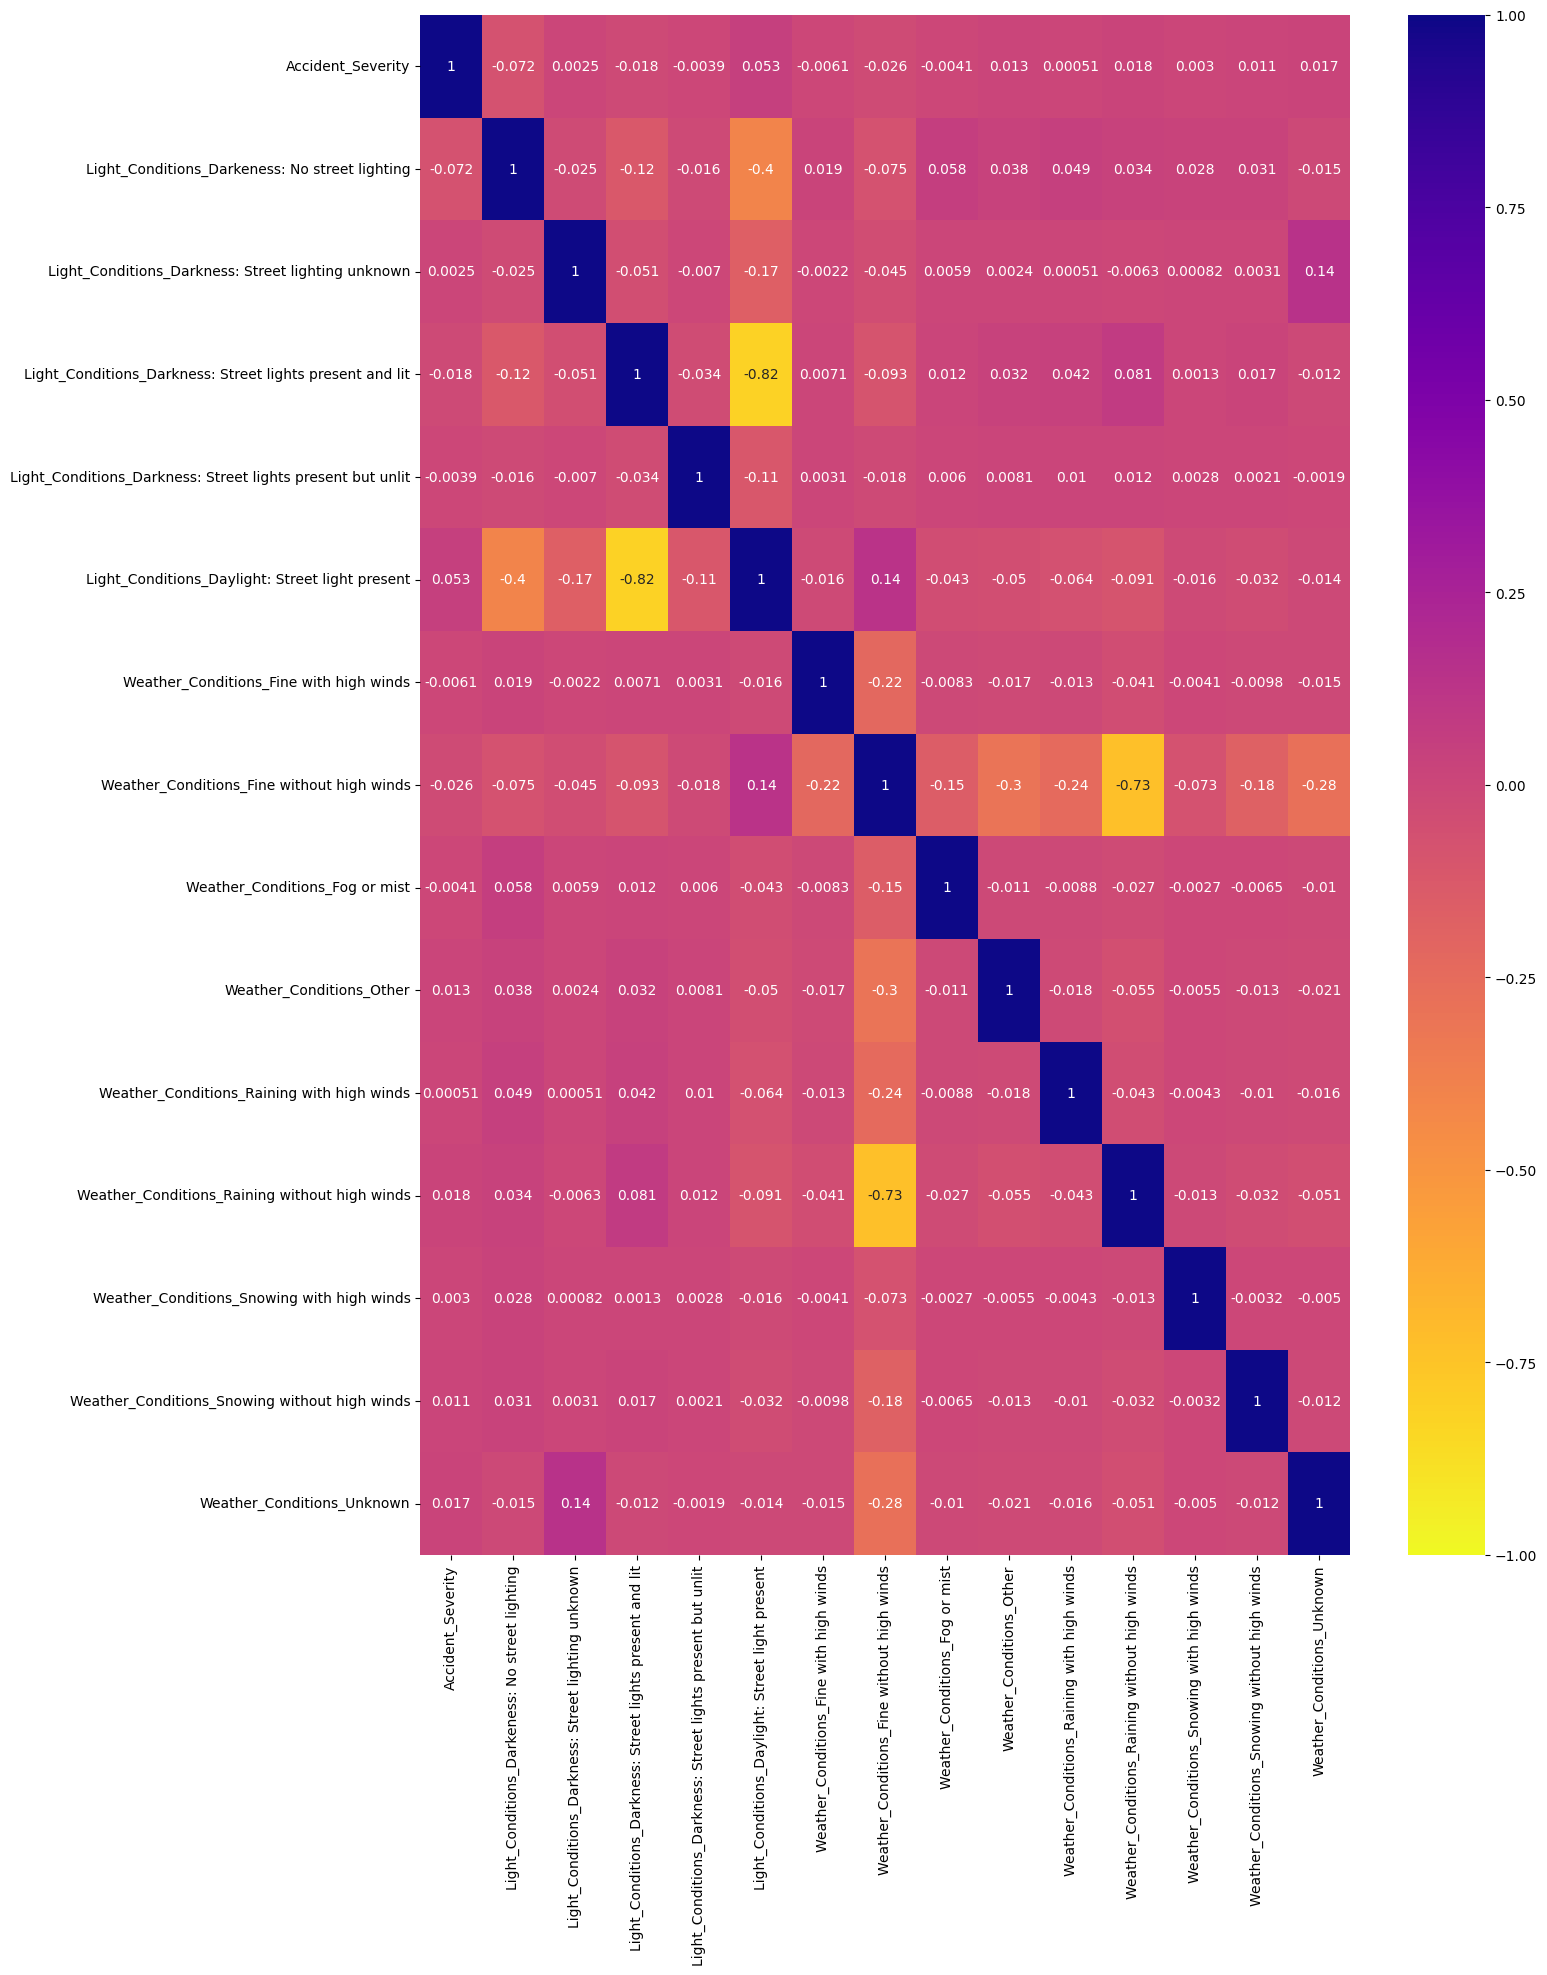

In [27]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity_wl_corr, vmin=-1, cmap='plasma_r', annot = True)

### Apriori

In [28]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

In [29]:
# killed = accident_severity_wl[accident_severity_wl["Accident_Severity"] == 1]
# killed = killed.drop(["Accident_Severity"], axis=1)

In [30]:
killed = accident_severity_df[accident_severity_df["Accident_Severity"] == 1]
killed = killed.drop(["Accident_Severity"], axis=1)

In [31]:
killed.head(5)

,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,...,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
17462,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
17467,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
17483,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
17499,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
17524,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [32]:
df1 = apriori(killed, min_support=0.1, use_colnames = True, verbose=1)
df1

Processing 40 combinations | Sampling itemset size 54


,support,itemsets
0,0.194444,(Day_of_Week_Friday)
1,0.166667,(Day_of_Week_Saturday)
2,0.138889,(Day_of_Week_Thursday)
3,0.111111,(Day_of_Week_Tuesday)
4,0.277778,(Day_of_Week_Wednesday)
...,...,...
168,0.111111,"(Road_Surface_Conditions_Dry, Day_of_Week_Thur..."
169,0.111111,"(Road_Surface_Conditions_Dry, Light_Conditions..."
170,0.166667,"(Road_Surface_Conditions_Dry, Road_Type_Single..."
171,0.194444,"(Junction_Control_Giveway or uncontrolled, Roa..."


In [33]:
KnC_apriori = association_rules(df1, metric = "confidence", min_threshold = 0.6)
KnC_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Day_of_Week_Friday),(Road_Type_Single carriageway),0.194444,0.777778,0.166667,0.857143,1.102041,0.015432,1.555556,0.114943
1,(Day_of_Week_Friday),(Light_Conditions_Darkness: Street lights pres...,0.194444,0.472222,0.138889,0.714286,1.512605,0.047068,1.847222,0.420690
2,(Day_of_Week_Friday),(Weather_Conditions_Fine without high winds),0.194444,0.944444,0.166667,0.857143,0.907563,-0.016975,0.388889,-0.112245
3,(Day_of_Week_Friday),(Road_Surface_Conditions_Dry),0.194444,0.861111,0.166667,0.857143,0.995392,-0.000772,0.972222,-0.005714
4,(Day_of_Week_Saturday),(Road_Type_Single carriageway),0.166667,0.777778,0.166667,1.000000,1.285714,0.037037,inf,0.266667
...,...,...,...,...,...,...,...,...,...,...
479,"(Junction_Control_Giveway or uncontrolled, Wea...",(Road_Surface_Conditions_Dry),0.194444,0.861111,0.166667,0.857143,0.995392,-0.000772,0.972222,-0.005714
480,"(Junction_Control_Giveway or uncontrolled, Lig...","(Road_Type_Single carriageway, Weather_Conditi...",0.166667,0.722222,0.166667,1.000000,1.384615,0.046296,inf,0.333333
481,"(Junction_Control_Giveway or uncontrolled, Roa...","(Road_Surface_Conditions_Dry, Weather_Conditio...",0.194444,0.861111,0.166667,0.857143,0.995392,-0.000772,0.972222,-0.005714
482,"(Junction_Control_Giveway or uncontrolled, Lig...","(Road_Surface_Conditions_Dry, Road_Type_Single...",0.194444,0.638889,0.166667,0.857143,1.341615,0.042438,2.527778,0.316092


In [34]:
# filter = KnC_apriori[ (KnC_apriori['confidence'] >= 0.6) & (KnC_apriori['support'] >= 0.2) &  (KnC_apriori['support'] <= 0.8)]

### FP Growth

In [35]:
from mlxtend.frequent_patterns import fpgrowth
#running the fpgrowth algorithm
res=fpgrowth(killed,min_support=0.05, use_colnames=True)
# printing top 10
res.head(10)

,support,itemsets
0,0.944444,(Weather_Conditions_Fine without high winds)
1,0.861111,(Road_Surface_Conditions_Dry)
2,0.777778,(Road_Type_Single carriageway)
3,0.472222,(Light_Conditions_Darkness: Street lights pres...
4,0.416667,(Junction_Control_Giveway or uncontrolled)
5,0.111111,(Day_of_Week_Tuesday)
6,0.305556,(Junction_Control_Not Specified)
7,0.166667,(Day_of_Week_Saturday)
8,0.138889,(Road_Surface_Conditions_Wet/Damp)
9,0.055556,(Weather_Conditions_Raining without high winds)


In [36]:
# importing required module
from mlxtend.frequent_patterns import association_rules
# creating asssociation rules
res=association_rules(res, metric="lift", min_threshold=1)
# printing association rules
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road_Surface_Conditions_Dry),(Weather_Conditions_Fine without high winds),0.861111,0.944444,0.861111,1.000000,1.058824,0.047840,inf,0.400000
1,(Weather_Conditions_Fine without high winds),(Road_Surface_Conditions_Dry),0.944444,0.861111,0.861111,0.911765,1.058824,0.047840,1.574074,1.000000
2,"(Road_Surface_Conditions_Dry, Road_Type_Single...",(Weather_Conditions_Fine without high winds),0.638889,0.944444,0.638889,1.000000,1.058824,0.035494,inf,0.153846
3,"(Road_Type_Single carriageway, Weather_Conditi...",(Road_Surface_Conditions_Dry),0.722222,0.861111,0.638889,0.884615,1.027295,0.016975,1.203704,0.095652
4,(Road_Surface_Conditions_Dry),"(Road_Type_Single carriageway, Weather_Conditi...",0.861111,0.722222,0.638889,0.741935,1.027295,0.016975,1.076389,0.191304
...,...,...,...,...,...,...,...,...,...,...
3541,"(Road_Type_Single carriageway, Day_of_Week_Sun...","(Road_Surface_Conditions_Dry, Weather_Conditio...",0.055556,0.861111,0.055556,1.000000,1.161290,0.007716,inf,0.147059
3542,"(Day_of_Week_Sunday, Weather_Conditions_Fine w...","(Road_Surface_Conditions_Dry, Road_Type_Single...",0.083333,0.638889,0.055556,0.666667,1.043478,0.002315,1.083333,0.045455
3543,(Road_Surface_Conditions_Dry),"(Road_Type_Single carriageway, Day_of_Week_Sun...",0.861111,0.055556,0.055556,0.064516,1.161290,0.007716,1.009579,1.000000
3544,(Day_of_Week_Sunday),"(Road_Surface_Conditions_Dry, Road_Type_Single...",0.083333,0.638889,0.055556,0.666667,1.043478,0.002315,1.083333,0.045455
